In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data: normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))
# Select only the "1" digit as normal data for training
normal_data = x_train[y_train == 1]


In [5]:
# Define the Autoencoder architecture
input_dim = normal_data.shape[1]
encoding_dim = 32 # Dimension of the latent representation
# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

In [6]:
# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)
# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
# Separate the encoder model for anomaly detection
encoder_model = Model(inputs=input_layer, outputs=encoder)


In [7]:
# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder on the normal data
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2174
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124
Epoch 16/50
27/27 ━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


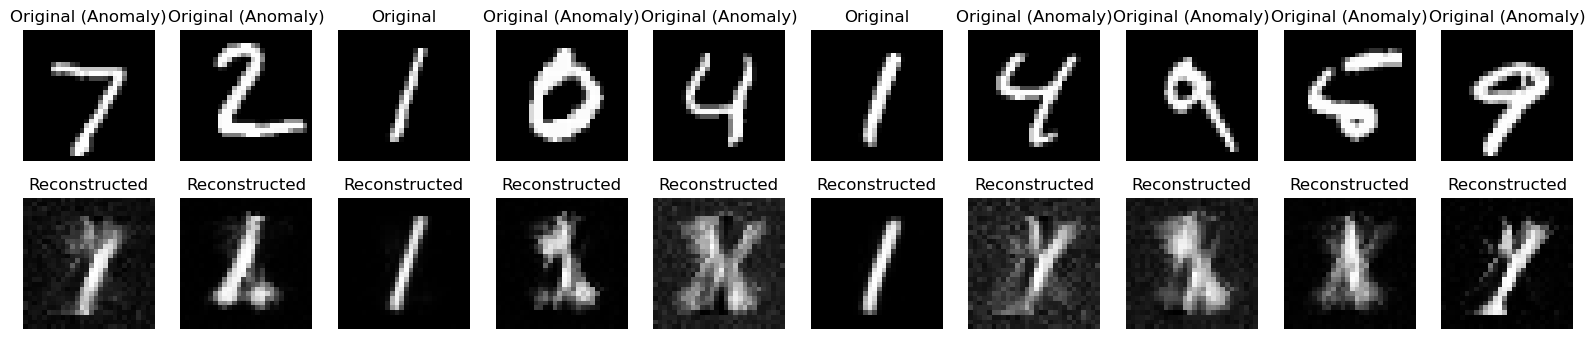

In [8]:
# Predict on the test data
reconstructed = autoencoder.predict(x_test)
# Compute reconstruction error
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)
# Set a threshold for anomaly detection (this can be adjusted)
threshold = 0.01
# Identify anomalies
anomalies = mse > threshold
# Visualize some results
n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Original images
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
 plt.title("Original" + (" (Anomaly)" if anomalies[i] else ""))
 plt.axis('off')
 # Reconstructed images
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
 plt.title("Reconstructed")
 plt.axis('off')
plt.show()